In [41]:
# use following codes to analyze codi data (data from old version of CODI platform)
# fit size distributions with lognormal functions (one for antibody aggregates and one for doulble positive particles-EV)
# use two lognormal functions to fit the distribution of single positive particles, and find optimal weights

In [42]:
import pandas as pd
%matplotlib inline 
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

In [43]:
#getting sigma, loc, scale, 3 parameters for log normal fitting for EV and AB from each file

def lognorm_single(x, amp1, mu1, sigma1,loc1):
    return amp1 * lognorm.pdf(x, sigma1,loc=loc1, scale=np.exp(mu1))

number of ab aggregates particles:
2223
median radius is: 
18.791447
[0.76470412 2.49571179 0.34478228 5.0895111 ]


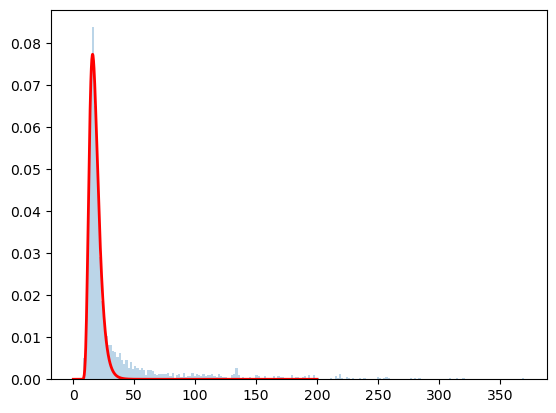

R-squared value: 0.9783598212875442


In [52]:
#antibody aggregates (AB) fitting with lognormal function, using curve_fit function, bins need to be 200!
# for size, use the feature called 'radius_of_gyration'
# use total files containing more antibody aggregates to do the fitting 
# (need to copy AB particles information together, keep the file header as original files)

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/control cd9 cd81/wash twice/total.csv')

df_new = df.loc[13:] # 14 for single file, 13 for 'total' file to remove header
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

# double positive antibody aggregates are rare
# for single positive antibody aggregates, they have similar size distribution for both channels
rslt_df = df1[(df1['Channel 1 binned counts'] < 3 )| (df1['Channel 2 binned counts'] >= 3)]  #channel 1 or 2 positive
radius = rslt_df['radius_of_gyration']
print('number of ab aggregates particles:')
print(len(radius))
print('median radius is: ')
print(radius.median())


data1 = radius
hist, bin_edges = np.histogram(data1, bins=200, density=True) #200/50, R2 value varies a lot. smaller bins, higher R2


p0 = [0.5, 0.5, 1, 1]
# p0 = [0.1, 0.1, 0.1, 0.1]

# fit the histogram with lognormal function
params, cov = curve_fit(lognorm_single, (bin_edges[0:-1]+bin_edges[1:])/2, hist, p0=p0, 
                         maxfev=5000000)#lower bound for loc1 needs to be 0?
print(params)
# Plot the fitted distribution
x = np.linspace(0, 200, 1000)
# plt.scatter((bin_edges[0:-1]+bin_edges[1:])/2,hist)
bins=200
plt.hist(data1, bins, density=True, alpha=0.3)

#plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, lognorm_single(x, *params), 'r-', lw=2)
plt.show()

# Evaluate the fit using the R-squared value
residuals = hist - lognorm_single((bin_edges[0:-1]+bin_edges[1:])/2, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)
amp11, mu1, sigma1,loc1=params

number of double positive particles: 
5808
median radius is: 
59.3534425
[1.05131076 4.06385778 0.64277566 2.7079663 ]


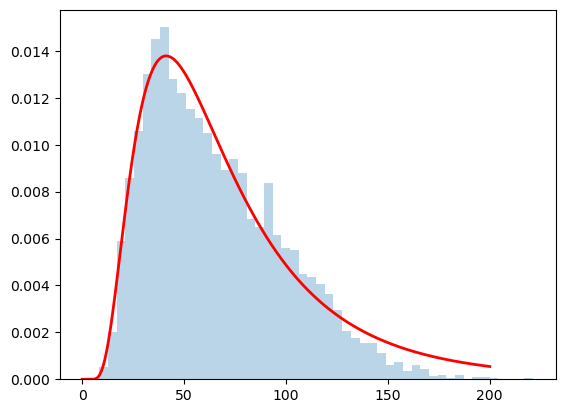

R-squared value: 0.9748277044658573


In [53]:
#EV fitting with lognormal function, using curve_fit function

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/total.csv')

df_new = df.loc[13:] # 14 for single file, 13 for 'total' file

df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

rslt_df = df1[(df1['Channel 1 binned counts'] >= 3 )& (df1['Channel 2 binned counts'] >= 3)]  #double positive
radius = rslt_df[rslt_df['radius_of_gyration']<300]['radius_of_gyration']

print('number of double positive particles: ')
print(len(radius))
print('median radius is: ')
print(radius.median())
max_v= radius.max()
bin_width=20

#distribution of double positive particles (EV) fitting with lognormal function (using curve_fit)
data1 = radius
hist, bin_edges = np.histogram(data1, bins=50, density=True)#50,200 for bins
plt.show()

# plt.scatter(bin_edges[1:],hist)
bins=50
plt.hist(data1, bins, density=True, alpha=0.3)

p0 = [0.5, 0.1, 0.5, 1]

params, cov = curve_fit(lognorm_single, (bin_edges[0:-1]+bin_edges[1:])/2, hist, p0=p0, 
                         maxfev=5000000)#lower bound for loc1 needs to be 0?
print(params)
# Plot the fitted distribution
x = np.linspace(0, 200, 1000)
#plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, lognorm_single(x, *params), 'r-', lw=2)
plt.show()

# Evaluate the fit using the R-squared value

residuals = hist - lognorm_single((bin_edges[0:-1]+bin_edges[1:])/2, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)
amp22, mu2, sigma2,loc2=params

In [46]:
# the summation of two lognormal functions with individual weights
# using two lognormal functions to fit the distribution of single positive particles, and find optimal weights
def lognorm_2amp(x, amp1, amp2):    
    return amp1 * lognorm.pdf(x, sigma1,loc1, scale=np.exp(mu1)) + amp2 * lognorm.pdf(x, sigma2, loc2, scale=np.exp(mu2))

interested particle numbers for channel 2/CD9 single positive
2388
median radius of interested particle numbers
53.8666925
mu1, sigma1,loc1, mu2, sigma2,loc2
2.4957117890587193 0.344782280050411 5.089511097306287 4.063857778874265 0.6427756591249133 2.707966297486643
amp1, amp2
[0.15277241 0.81547679]
R-squared value: 0.837343844137697
percentage of AB, percentage of EV
[16.162792341436717, 83.83720765856329]


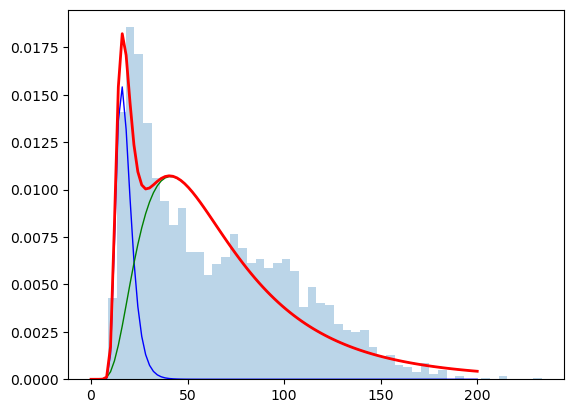

the number of single cd9 positive ev after removing ab aggregates are: 
2002.0325188864913
the inital number of single cd9 positive ev before correction: 
2388


In [47]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9

rslt_df = df1[(df1['Channel 1 binned counts'] < 3 )& (df1['Channel 2 binned counts'] >= 3)]  #channel 2 positive
radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())


data=radius
bins=50
hist, bin_edges = np.histogram(data, bins, density=True)

p0=[0.1,0.1]
print('mu1, sigma1,loc1, mu2, sigma2,loc2')
print(mu1, sigma1,loc1,mu2, sigma2,loc2)

params, cov = curve_fit(lognorm_2amp, (bin_edges[0:-1]+bin_edges[1:])/2,hist, p0=p0, 
                        bounds=((0.1, 0.1), (100, 100)),
                        maxfev=500000)
print('amp1, amp2')
print(params)
#print(cov)
# Plot the fitted distribution
# x = np.linspace(0, 200, 1000)
# plt.hist(data, bins, density=False, alpha=0.5)
# plt.show()
# plt.hist(data, bins, density=True, alpha=0.5)
# plt.plot(x, lognorm_2amp(x, *params), 'r-', lw=2)
# plt.show()

#Evaluate the fit using the R-squared value

residuals = hist - lognorm_2amp((bin_edges[0:-1]+bin_edges[1:])/2, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)


# show plot
plt.show()

plt.hist(data, bins, density=True, alpha=0.3)
# plt.scatter(bin_edges[1:],hist)

lognorm_dist1 = stats.lognorm(sigma1, loc=loc1, scale=np.exp(mu1))
lognorm_dist2 = stats.lognorm(sigma2, loc=loc2, scale=np.exp(mu2))

amp1= params[0]
amp2=params[1]
#print([amp1,amp2])

x = np.linspace(0, 200, 100)
y1 = amp1*lognorm_dist1.pdf(x)
sum_y1=sum(y1)
y2 = amp2*lognorm_dist2.pdf(x)
sum_y2=sum(y1)

percent1 = sum(y1) / (sum(y1)+sum(y2)) * 100
percent2 = sum(y2) / (sum(y1)+sum(y2)) * 100
print('percentage of AB, percentage of EV')
print([percent1,percent2])
plt.plot(x, amp1*lognorm_dist1.pdf(x), 'b-', lw=1)
plt.plot(x, amp2*lognorm_dist2.pdf(x), 'g-', lw=1)
plt.plot(x, lognorm_2amp(x, *params), 'r-', lw=2)
plt.show()
print('the number of single cd9 positive ev after removing ab aggregates are: ')
print(len(radius)*percent2/100)
print('the inital number of single cd9 positive ev before correction: ')
print(len(radius))

number of channel 1/cd81 single positive particles: 
819
median radius is: 
55.71085
mu1, sigma1,loc1, mu2, sigma2,loc2
2.4957117890587193 0.344782280050411 5.089511097306287 4.063857778874265 0.6427756591249133 2.707966297486643
amp1, amp2
[0.10000332 0.92636091]
R-squared value: 0.8052309526037273
percentage of AB, percentage of EV
[9.998403428912503, 90.00159657108749]
the number of single cd81 positive particles after removing ab aggregates are: 
737.1130759172066
the number of single cd81 positive particles before correction are: 
819


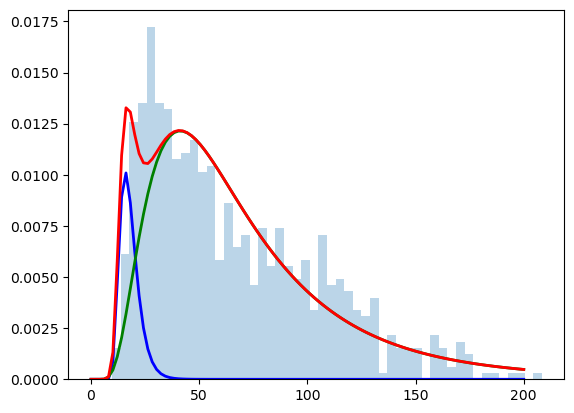

In [48]:
# for CD81
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels

# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/1.csv')
#df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/20230421 tim4 oni ev ab 2.csv')


rslt_df = df1[(df1['Channel 1 binned counts'] >= 3 )& (df1['Channel 2 binned counts'] < 3)]  #channel 1 positive
radius = rslt_df['radius_of_gyration']
print('number of channel 1/cd81 single positive particles: ')
print(len(radius))
print('median radius is: ')
print(radius.median())

data=radius
bins=50
hist, bin_edges = np.histogram(data, bins, density=True)

p0=[0.1,0.1]
print('mu1, sigma1,loc1, mu2, sigma2,loc2')
print(mu1, sigma1,loc1,mu2, sigma2,loc2)

params, cov = curve_fit(lognorm_2amp, (bin_edges[0:-1]+bin_edges[1:])/2,hist, p0=p0, 
                        bounds=((0.1, 0.1), (100, 100)),
                        maxfev=500000)
print('amp1, amp2')
print(params)
#print(cov)
# # Plot the fitted distribution
# x = np.linspace(0, 200, 1000)
# plt.hist(data, bins, density=False, alpha=0.5)
# plt.show()
# plt.hist(data, bins*4, density=True, alpha=0.5)
# #plt.plot(x, lognorm_mixture(x, *params), 'r-', lw=2)
# plt.plot(x, lognorm_2amp(x, *params), 'r-', lw=2)
# plt.show()

#Evaluate the fit using the R-squared value

residuals = hist - lognorm_2amp((bin_edges[0:-1]+bin_edges[1:])/2, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)


# show plot
plt.show()

# plt.scatter(bin_edges[1:],hist)

lognorm_dist1 = stats.lognorm(sigma1, loc=loc1, scale=np.exp(mu1))
lognorm_dist2 = stats.lognorm(sigma2, loc=loc2, scale=np.exp(mu2))

amp1= params[0]
amp2=params[1]
#print([amp1,amp2])

x = np.linspace(0, 200, 100)
y1 = amp1*lognorm_dist1.pdf(x)
sum_y1=sum(y1)
y2 = amp2*lognorm_dist2.pdf(x)
sum_y2=sum(y1)

percent1 = sum(y1) / (sum(y1)+sum(y2)) * 100
percent2 = sum(y2) / (sum(y1)+sum(y2)) * 100
print('percentage of AB, percentage of EV')
print([percent1,percent2])
plt.hist(data, bins, density=True, alpha=0.3)
plt.plot(x, amp1*lognorm_dist1.pdf(x), 'b-', lw=2)
plt.plot(x, amp2*lognorm_dist2.pdf(x), 'g-', lw=2)
plt.plot(x, lognorm_2amp(x, *params), 'r-', lw=2)
print('the number of single cd81 positive particles after removing ab aggregates are: ')
print(len(radius)*percent2/100)
print('the number of single cd81 positive particles before correction are: ')
print(len(radius))

In [ ]:
# recalculate the percentages for each EV phenotypes